## Introduction to Scikit-Learn (SkLearn)
This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn Library.

0. An end-to-end Scikit-Learn Workflow
1. Getting the data ready
2. Choose the right estimator
3. Fit the model/Algo and use it to make predictions on our data
4. Evaluate the model
5. Improve the model
6. Save and load a trained model
7. PUtting in all together!

## 0. An end-to-end Scikit-Learn workFlow

In [2]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("../dataSets/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
import warnings
warnings.filterwarnings("default")

In [15]:
# Creating feature and Target Vector
X = heart_disease.drop(columns="target", axis=1)
y = heart_disease["target"]

In [16]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
# 3. Fit the model to the training Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [20]:
# Evalute the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [8]:
clf.score(X_test, y_test)

0.8852459016393442

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with Machine Learning
Three main things we have to do:

    1. Split the data into features and labels(Usually 'X' and 'y')
    
    2. Filling (also called imputing) or disregarding missing values
    
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [19]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it is numerical

In [20]:
car_sales = pd.read_csv("../dataSets/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [21]:
len(car_sales)

1000

In [22]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [11]:
# Split the data into Future Matrix(X) and Target Vector(y)
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]


# Split into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Nissan'

In [24]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([(
                "one_hot",
                one_hot,
                categorical_features)],
                                remainder="passthrough"
                               )
transformer_X = transformer.fit_transform(X)
transformer_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [17]:
pd.DataFrame(transformer_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [25]:
## the get_dummies function also work as the OneHotEncoder.
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [29]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformer_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
model.score(X_test, y_test)

0.2920788538619685

In [31]:
model.score(X_train, y_train)

0.18397659072947548

### 1.2 What if they were missing values ?.
1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [2]:
# import car sales missing data
car_sales_missing = pd.read_csv("../dataSets/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [5]:
# create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [6]:
# Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

caterigorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 caterigorical_features)],
                                 remainder="passthrough")
transformer_X = transformer.fit_transform(X)
transformer_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [7]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### option1: Fill missing values with Pandas

In [10]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [12]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

car_sales_missing["Doors"].fillna(4, inplace=True) # We are filling with the majority of the Doors.

In [13]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [14]:
# Remove rows with missing Price values
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [15]:
len(car_sales_missing)

950

In [16]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]



In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([(
                "one_hot",
                one_hot,
                categorical_features)],
                                remainder="passthrough"
                               )
transformer_X = transformer.fit_transform(car_sales_missing)
transformer_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 2 : Fill missing values with Scikit-learn

In [19]:
car_missing_missing = pd.read_csv("../dataSets/car-sales-extended-missing-data.csv")
car_missing_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [20]:
car_missing_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [22]:
# Dropping the rows with no lables(y)
car_missing_missing.dropna(subset=["Price"], inplace=True)
car_missing_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [23]:
# Split into X and y
X = car_missing_missing.drop("Price", axis=1)
y = car_missing_missing["Price"]

In [26]:
# Filling missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [27]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [28]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([(
                "one_hot",
                one_hot,
                categorical_features)],
                                remainder="passthrough"
                               )
transformer_X = transformer.fit_transform(car_sales_filled)
transformer_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [31]:
# Now we've got our data as numb and also fill missing values
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformer_X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((760, 15), (190, 15), (760,), (190,))

In [32]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the right estimators/algorithm for your problem
Some things to note:
* Sklearn refers to machine learning models, algo as estimators.
* Classification problem we are predicting a category (heart disears or not)
    * Sometimes you'll see 'clf'(Short for classifier) used as a classification estimator
* Regression problem - predicting a number (Selling price of a car)

### 2.1 Picking a machine learning model for regression problem

Let's use the california Housig Dataset

In [14]:
# Get Califormnia Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [15]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [15]:
housing_df = housing_df.drop("MedHouseVal",axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
# Setup random seed
np.random.seed(42)

# Create our data into Future matrix and Target vector
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

In [20]:
model = SVR()
model.fit(X_train,y_train)
model.score(X_test,y_test)

-0.01648536010717372

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Create our X and Y
X = housing_df.drop("target", axis =1)
y = housing_df["target"]

#Splitting our Data into Test and Train set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
model_regressor.fit(X_train, y_train)
model_regressor.score(X_test, y_test)

0.8051230593157366

### 2.2 Picking a machine Learning model for a classification problem

In [24]:
heart_disease = pd.read_csv("../dataSets/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate our estimator
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate our SVC
clf.score(X_test, y_test)

C:\Users\Livingston\Desktop\ml-course\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Livingston\Desktop\ml-course\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [30]:
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate our estimator
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate our RandomForestClassifier
clf.score(X_test, y_test)

0.8360655737704918

### 2.2 Choosing an estimator for a cliassification probelm

In [31]:
heart_disease = pd.read_csv("../dataSets/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
# Using LinearSVC

#Importing the RanRandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make the data
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8360655737704918

## 3. Fit the model/Algo on our data and use it to make Predictions
    3.1 Fitting the model and the data

In [6]:
# Using LinearSVC

#Importing the RanRandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
np.random.seed(42)

# make the data
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8360655737704918

In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make Predictions using our ML model
2. Two ways to make a predictions:
   * 'predict()'
   * predict_proba()

In [40]:
# Use a trained model to make a prediction
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
# Compare predictions to truth models to eveluate the model.
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8360655737704918

In [44]:
clf.score(X_test, y_test)

0.8360655737704918

In [45]:
# Another way to predict score.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8360655737704918

In [46]:
# Make predictions with predict_proba(). Predict_proba() returns proba of a classification model

clf.predict_proba(X_test)

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79],
       [0.16, 0.84],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.53, 0.47],
       [0.19, 0.81],
       [0.64, 0.36],
       [0.07, 0.93],
       [0.87, 0.13],
       [0.04, 0.96],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.92, 0.08],
       [0.98, 0.02],
       [0.94, 0.06],
       [0.54, 0.46],
       [0.9 , 0.1 ],
       [0.35, 0.65],
       [0.23, 0.77],
       [0.35, 0.65],
       [0.34, 0.66],
       [0.21, 0.79],
       [0.3 , 0.7 ],
       [0.9 , 0.1 ],
       [0.12, 0.88],
       [0.91, 0.09],
       [0.91, 0.09],
       [0.97, 0.03],
       [0.67, 0.33],
       [0.47, 0.53],
       [0.81, 0.19],
       [0.41, 0.59],
       [0.22, 0.78],
       [0.41, 0.59],
       [0.13, 0.87],
       [0.19, 0.81],
       [0.26, 0.74],
       [0.16, 0.84],
       [0.34, 0.66],
       [0.29, 0.71],
       [0.76, 0.24],
       [0.45, 0.55],
       [0.01,

In [47]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

'predict()' can also be used for regression model

In [50]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8051230593157366

In [51]:
y_preds = model.predict(X_test)

y_preds[:10]

array([0.5095   , 0.74161  , 4.9232571, 2.52961  , 2.27369  , 1.64692  ,
       2.37605  , 1.66932  , 2.7729706, 4.9134589])

In [52]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [53]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32754256845930246

In [54]:
housing_df["target"].head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

## 4.0 Evaluating a machine learning model
Three ways to evaluate in sklearn.

    1. Esitmators build in score() method
    
    2. The Scoring parameter
    
    3. Problem-speicific metric function

### 4.1 Evaluating a model with the *Score* method

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(random_state=41)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=41)

In [10]:
model.score(X_test, y_test)

0.8688524590163934

In [12]:
y_preds = model.predict(X_test)
mean_absolute_error(y_test, y_preds)

0.13114754098360656

In [21]:
# Using the score method for the regression problem...
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
np.random.seed(42)
#Create our data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X.shape, y.shape

((20640, 8), (20640,))

In [22]:
# Splitting the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [23]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [24]:
model.score(X_test, y_test)

0.8051230593157366

In [25]:
y_preds = model.predict(X_test)
mean_absolute_error(y_test, y_preds)

0.32754256845930246

### 4.2 Evaluating a model using scoring parameter

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(random_state=41)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=41)

In [28]:
model.score(X_test, y_test)

0.8688524590163934

In [31]:
cross_val_score(model, X,y)

array([0.80327869, 0.8852459 , 0.78688525, 0.81666667, 0.78333333])

In [32]:
np.random.seed(42)

# Single training and test split score
clf_single_score = model.score(X_test, y_test)
clf_cross_val_score = np.mean(cross_val_score(clf, X,y,cv=5))

clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8381967213114756)

## 4.2.1 Classification model evaluation metrics

1. Accuaracy
2. Area under a ROC curve
3. Confusion matrix
4. Classification report

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(random_state=42)
score = cross_val_score(clf, X,y)
score


array([0.81967213, 0.8852459 , 0.83606557, 0.85      , 0.8       ])

In [4]:
np.mean(score)

0.8381967213114756

In [5]:
print(f"Heart Disease Classifier Accuracy: {np.mean(score) * 100}")

Heart Disease Classifier Accuracy: 83.81967213114756


### Area under the receiver operating characteristic curve(AUC/ROC)**
* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate versus a models false postive rate.
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = models predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

In [6]:
from sklearn.metrics import roc_curve,auc

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)
clf.fit(X_train, y_train)

y_pobs = clf.predict_proba(X_test)
y_pobs

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79],
       [0.16, 0.84],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.53, 0.47],
       [0.19, 0.81],
       [0.64, 0.36],
       [0.07, 0.93],
       [0.87, 0.13],
       [0.04, 0.96],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.92, 0.08],
       [0.98, 0.02],
       [0.94, 0.06],
       [0.54, 0.46],
       [0.9 , 0.1 ],
       [0.35, 0.65],
       [0.23, 0.77],
       [0.35, 0.65],
       [0.34, 0.66],
       [0.21, 0.79],
       [0.3 , 0.7 ],
       [0.9 , 0.1 ],
       [0.12, 0.88],
       [0.91, 0.09],
       [0.91, 0.09],
       [0.97, 0.03],
       [0.67, 0.33],
       [0.47, 0.53],
       [0.81, 0.19],
       [0.41, 0.59],
       [0.22, 0.78],
       [0.41, 0.59],
       [0.13, 0.87],
       [0.19, 0.81],
       [0.26, 0.74],
       [0.16, 0.84],
       [0.34, 0.66],
       [0.29, 0.71],
       [0.76, 0.24],
       [0.45, 0.55],
       [0.01,

In [7]:
y_probs_positive = y_pobs[:,1]
y_probs_positive[:10]

array([0.05, 0.62, 0.55, 0.14, 0.79, 0.84, 0.64, 0.05, 0.04, 0.47])

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr, tpr, thresholds     # fpr(false positive), tpr(True positive)

(array([0.        , 0.        , 0.        , 0.        , 0.03448276,
        0.03448276, 0.06896552, 0.10344828, 0.10344828, 0.13793103,
        0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
        0.24137931, 0.24137931, 0.31034483, 0.4137931 , 0.44827586,
        0.51724138, 0.55172414, 0.65517241, 0.68965517, 0.72413793,
        0.86206897, 1.        ]),
 array([0.     , 0.0625 , 0.28125, 0.40625, 0.4375 , 0.59375, 0.65625,
        0.6875 , 0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625,
        0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
        0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     ]),
 array([ inf, 0.99, 0.85, 0.81, 0.79, 0.7 , 0.66, 0.65, 0.64, 0.62, 0.59,
        0.55, 0.46, 0.41, 0.36, 0.35, 0.33, 0.24, 0.19, 0.16, 0.14, 0.13,
        0.1 , 0.09, 0.08, 0.05, 0.  ]))

Text(0, 0.5, 'True positive Rate')

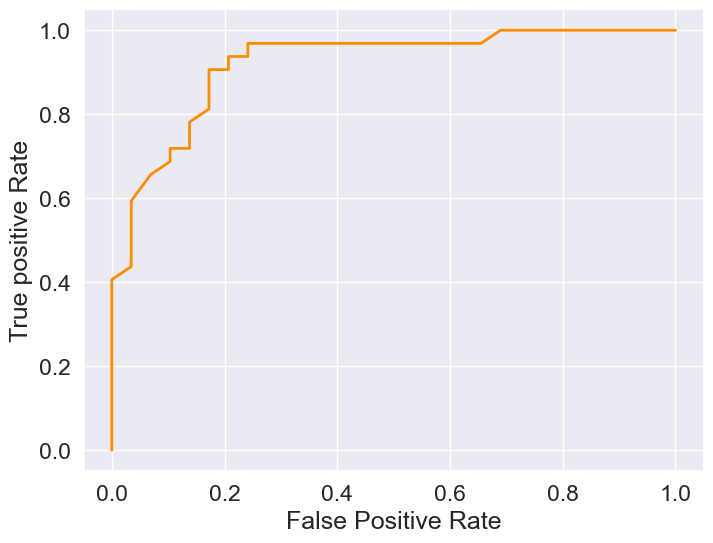

In [9]:
import matplotlib.pyplot as plt

roc_curve = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)' % roc_auc")
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')

## Confusion metrix. 
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppose to predict.

in essence, giving you an idea where the model is getting confuse

In [10]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [11]:
pd.crosstab(
    y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"]
)

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


<Axes: >

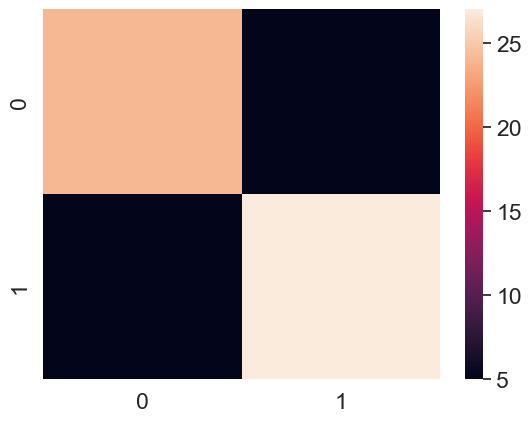

In [13]:
# Make our confusion matrix more visual with Seaborns heatmap
import seaborn as sns

# Set font scale
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat);

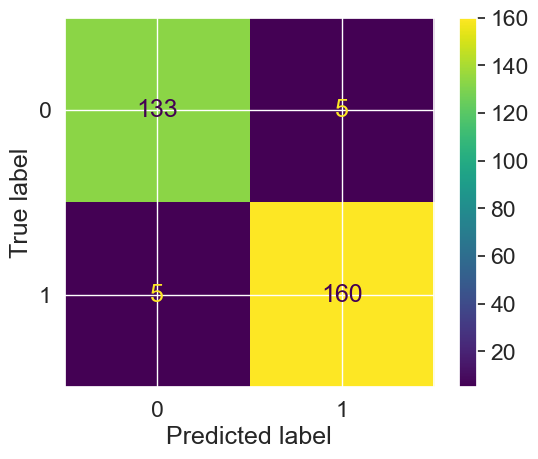

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

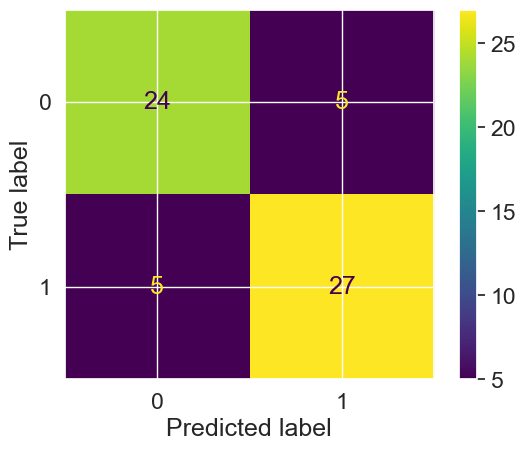

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

## Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [24]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
# Where precision and recall become valuable.

disease_true = np.zeros(1000)
disease_true[:100] = 1
disease_preds = np.zeros(1000)
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\Livingston\Desktop\ml-course\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Livingston\Desktop\ml-course\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Livingston\Desktop\ml-course\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.900000,0.0,0.9,0.450000,0.810000
recall,1.000000,0.0,0.9,0.500000,0.900000
f1-score,0.947368,0.0,0.9,0.473684,0.852632
support,900.000000,100.0,0.9,1000.000000,1000.000000


In [37]:
dd = pd.DataFrame(disease_true)

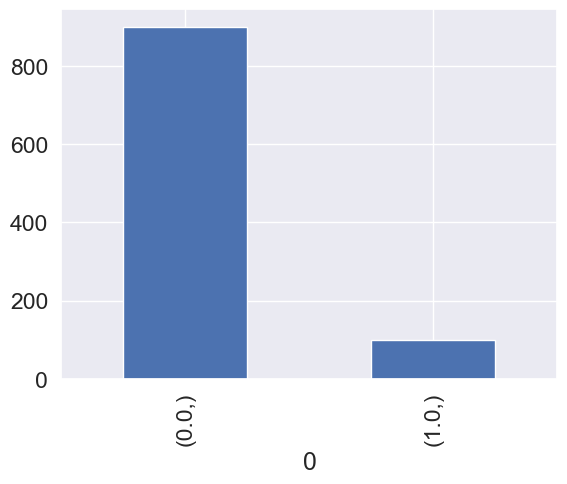

In [38]:
dd.value_counts().plot(
    kind='bar'
);

### 4.2.2 Regression model evaluation metrics.

We will cover:

1. R^2 (r-squred or coefficient of determination)
2. Mean Absolute error(MAE)
3. Mean Squred error(MSE)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.random.seed(42)

housing_dataset = pd.read_csv("../dataSets/heart-disease.csv")
housing_dataset
# X = hous

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
X = housing_dataset.drop("target", axis=1)
y = housing_dataset["target"]

# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
model.score(X_train,y_train), model.score(X_test, y_test)

(0.924203269641995, 0.5106393318965518)

In [10]:
housing_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
from sklearn.metrics import r2_score 

# Fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean[:10]

array([0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016])

In [12]:
r2_score(y_test, y_test_mean)

0.0

In [13]:
mean_absolute_error(y_test, model.predict(X_test))

0.23754098360655734

In [14]:
mean_squared_error(y_test, model.predict(X_test))   # Mean of the sqare of the errors b/t actual and predicted values

0.12204426229508197

### 4.3.3 Finally using Scoring parameter

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
np.random.seed(42)
heart_disease = pd.read_csv("../dataSets/heart-disease.csv")
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [16]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [17]:
# Cross-Validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}")

The cross-validated accuracy is: 82.48


In [18]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

### Evaluating different evaluation metrics as Scikit-Learn functions

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

heart_disease = pd.read_csv("../dataSets/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
# Creating X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Evaluate the model using evaluation function
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, clf.predict(X_test))*100:.2f} %")
print(f"Precision: {precision_score(y_test, clf.predict(X_test))*100:.2f} %")
print(f"Recall: {recall_score(y_test, clf.predict(X_test))*100:.2f} %")

Classifier metrics on the test set
Accuracy: 81.58 %
Precision: 81.40 %
Recall: 85.37 %


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
np.random.seed(42)

# housing_df = pd.read_csv("../dataSets/ho")
# X = 

### 5. Improving a Machine Learning Model

First predictions = baseline predictions.
First model = baseline model.

From a data Perspective:
    * Could we collect more data ?. (Generally, the more data, the better)
    * Could we improve our data ?.

From a model perspective:
    * Is they a better model we could use ?.
    * Could we improve the current model ?. (Hyperparameters)
    * 

In [22]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand.

Tuning hyperparameters by hand. we are going to do that in Validation set.

In [23]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* Max depth
* Max_features
* min_sample_leaf
* min_sample_split
* n_esitmators

In [24]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification.
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                    "precision": round(precision,2),
                    "recall": round(recall,2),
                    "f1": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 score: {f1 * 100:.2f}%")
    return metric_dict

In [25]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
np.random.seed(42)

# shuffle the data.
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation and test sets.
train_split = round(0.7 * len(heart_disease_shuffled)) # trainng set 70%
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
train_split, valid_split

(212, 257)

In [28]:
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split: valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [29]:
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
clf.fit(X_train, y_train)
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set.
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 score: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Hyperpaarameters Tuning with RandomizedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depths": [None, 5,10,20,30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2,4,6],
    "min_samples_leaf": [1,2,4]
}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled['target']

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassiffier.
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=grid, 
    n_iter=10,  # Number of models to try
    cv=5,
    verbose=2
)
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: Invalid parameter 'max_depths' for estimator RandomForestClassifier(min_samples_leaf=2, min_samples_split=6,
                       n_estimators=1200, n_jobs=1). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [33]:
rs_clf.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

### 5.3 Hyperparemter tuning with GridSearchCV

In [35]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depths': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [40]:
grid_2 = {   'n_estimators': [100, 200, 500],
             'max_depth': [None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_split': [6],
             'min_samples_leaf': [1, 2]
         }

In [41]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Splitting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# SetUp HyperParameter turning using GridSearchCV
gs_clf = GridSearchCV(
        estimator=clf,
        param_grid=grid_2,
        cv = 5,
        verbose=2
    )

# Fit the RandomizeGridSearchCV version of clf.
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\Livingston\Desktop\ml-course\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Livingston\Desktop\ml-course\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Livingston\Desktop\ml-course\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Livingston\Desktop\ml-course\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parame

In [42]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [43]:
y_preds = gs_clf.predict(X_test)

evaluate_preds(y_test, y_preds)

Acc: 81.97%
Precision: 77.42%
Recall: 85.71%
F1 score: 81.36%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## Let's compare our different model metrics.

In [47]:
compare_metrics = pd.DataFrame(
    {"baseline": baseline_metrics,
    "clf_2": clf_2_metrics,
    "random search": rs_metrics,
    "grid search": gs_metrics}
    )

compare_metrics.plot.bar()

NameError: name 'clf_2_metrics' is not defined

### 6. Saving and loading ML models.

Two ways to save and load a machine learning module:
1. With Python's pickle module
2. With the joblib module

In [48]:
import pickle

# Save the exisiting model
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))  # wb: Write Binary

In [49]:
# loading the save model
load_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb")) # rb: Read Binary
load_pickle_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [50]:
pickle_y_preds = load_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 77.42%
Recall: 85.71%
F1 score: 81.36%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

 ### Joblib

In [51]:
from joblib import dump, load

# Save the model to file.
dump(gs_clf, filename="gs_random_forest_model_1.joblib")


['gs_random_forest_model_1.joblib']

In [52]:
# Import a save joblib model.

loaded_job_model = load(filename="gs_random_forest_model_1.joblib")


In [53]:
loaded_job_model_pred = loaded_job_model.predict(X_test)
evaluate_preds(y_test, loaded_job_model_pred)

Acc: 81.97%
Precision: 77.42%
Recall: 85.71%
F1 score: 81.36%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

### 7. Putting it all together!